## Final Project (DATA 620) 
## Topic: Foursquare NYC restaurants
#### Authors: John Mazon, LeTicia Cancel, Bharani Nitalla

Video: 

# Downloading and Extracting Datasets

Two bipartite networks of users and restaurant locations in New York City on Foursquare, from 24 October 2011 to 20 February 2012. In one network, an edge denotes a check-in event of a user at a restaurant. In the other, an edge exists if a user left a tip/comment on a restaurant. Metadata include comments.

## Downloading The Dataset

In [ ]:
import os
import requests

checkin_network = "https://networks.skewed.de/net/foursquare/files/NYC_restaurant_checkin.csv.zip"
tips_network = "https://networks.skewed.de/net/foursquare/files/NYC_restaurant_tips.csv.zip"

# download checkkin network
with open("NYC_restaurant_checkin.csv.zip", "wb+") as archive:
    res = requests.get(checkin_network)
    print(len(res.content))
    archive.write(res.content)

# download tips network
with open("NYC_restaurant_tips.csv.zip", "wb+") as archive:
    res = requests.get(tips_network)
    print(len(res.content))
    archive.write(res.content)

163242
533783


## Extracting The Dataset

In [ ]:
import zipfile

checkin_network_path = os.path.join(os.curdir, "checkin_network")
tips_network_path = os.path.join(os.curdir, "tips_network")

# extract checkin network
with zipfile.ZipFile("NYC_restaurant_checkin.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(checkin_network_path)

# extract tips network
with zipfile.ZipFile("NYC_restaurant_tips.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(tips_network_path)

print(os.listdir())

['checkin_network', 'tips_network', 'NYC_restaurant_tips.csv.zip', 'NYC_restaurant_checkin.csv.zip', 'solution.ipynb']


# Importing The Dataset

In [ ]:
import networkx as nx
import pandas as pd

In [67]:
## checkin network
# load edges
edges_df = pd.read_csv("checkin_network/edges.csv")
edges_df.head()

# load nodes
nodes_df = pd.read_csv("checkin_network/nodes.csv", error_bad_lines=False)
nodes_df.head()

b'Skipping line 46: expected 5 fields, saw 8\nSkipping line 480: expected 5 fields, saw 9\nSkipping line 1142: expected 5 fields, saw 6\nSkipping line 2313: expected 5 fields, saw 7\nSkipping line 3546: expected 5 fields, saw 6\nSkipping line 4286: expected 5 fields, saw 8\n'


# index  ...                             _pos
0        0  ...  array([4.78554741, 2.75924748])
1        1  ...  array([4.80260447, 2.7801435 ])
2        2  ...  array([4.90057899, 2.78647497])
3        3  ...  array([4.93693984, 2.7753073 ])
4        4  ...  array([4.81268347, 2.75453265])

[5 rows x 5 columns]

In [90]:
count = 0

checkin_network_graph = nx.Graph()

for index, edge in edges_df.iterrows():
    source, dest = int(edge["# source"]), int(edge[" target"])
    
    checkin_network_graph.add_edge(source, dest)
    count += 1
    if count == 3000:
        break

print("Number of nodes in Checkin network:", checkin_network_graph.number_of_nodes())
print("Number of edges in Checkin network:", checkin_network_graph.number_of_edges())

Number of nodes in Checkin network: 1719
Number of edges in Checkin network: 2672


In [76]:
## tips network
# load edges
edges_df = pd.read_csv("tips_network/edges.csv")
edges_df.head()

# load nodes
nodes_df = pd.read_csv("tips_network/nodes.csv", error_bad_lines=False)
nodes_df.head()

b'Skipping line 316: expected 5 fields, saw 8\nSkipping line 1777: expected 5 fields, saw 7\nSkipping line 2972: expected 5 fields, saw 6\nSkipping line 3029: expected 5 fields, saw 8\nSkipping line 3342: expected 5 fields, saw 9\nSkipping line 6403: expected 5 fields, saw 6\n'


# index   is_user   name      tags                                 _pos
0        0         1  24436        []      array([ 17.750769, -27.424259])
1        1         0     15        []  array([ 16.21999187, -24.50698479])
2        2         1   8550        []  array([ 20.47999019, -29.18395441])
3        3         0     20  ['andy']  array([ 18.43875134, -25.91935512])
4        4         1   1537        []  array([ 18.32669941, -23.82201058])

In [91]:
count = 0

tips_network_graph = nx.Graph()

for index, edge in edges_df.iterrows():
    source, dest = int(edge["# source"]), int(edge[" target"])
    
    tips_network_graph.add_edge(source, dest)
    count += 1
    if count == 1500:
        break

print("Number of nodes in tips network:", tips_network_graph.number_of_nodes())
print("Number of edges in tips network:", tips_network_graph.number_of_edges())

Number of nodes in tips network: 998
Number of edges in tips network: 1318


# Graph Plots

In [ ]:
import matplotlib.pyplot as plt
import scipy


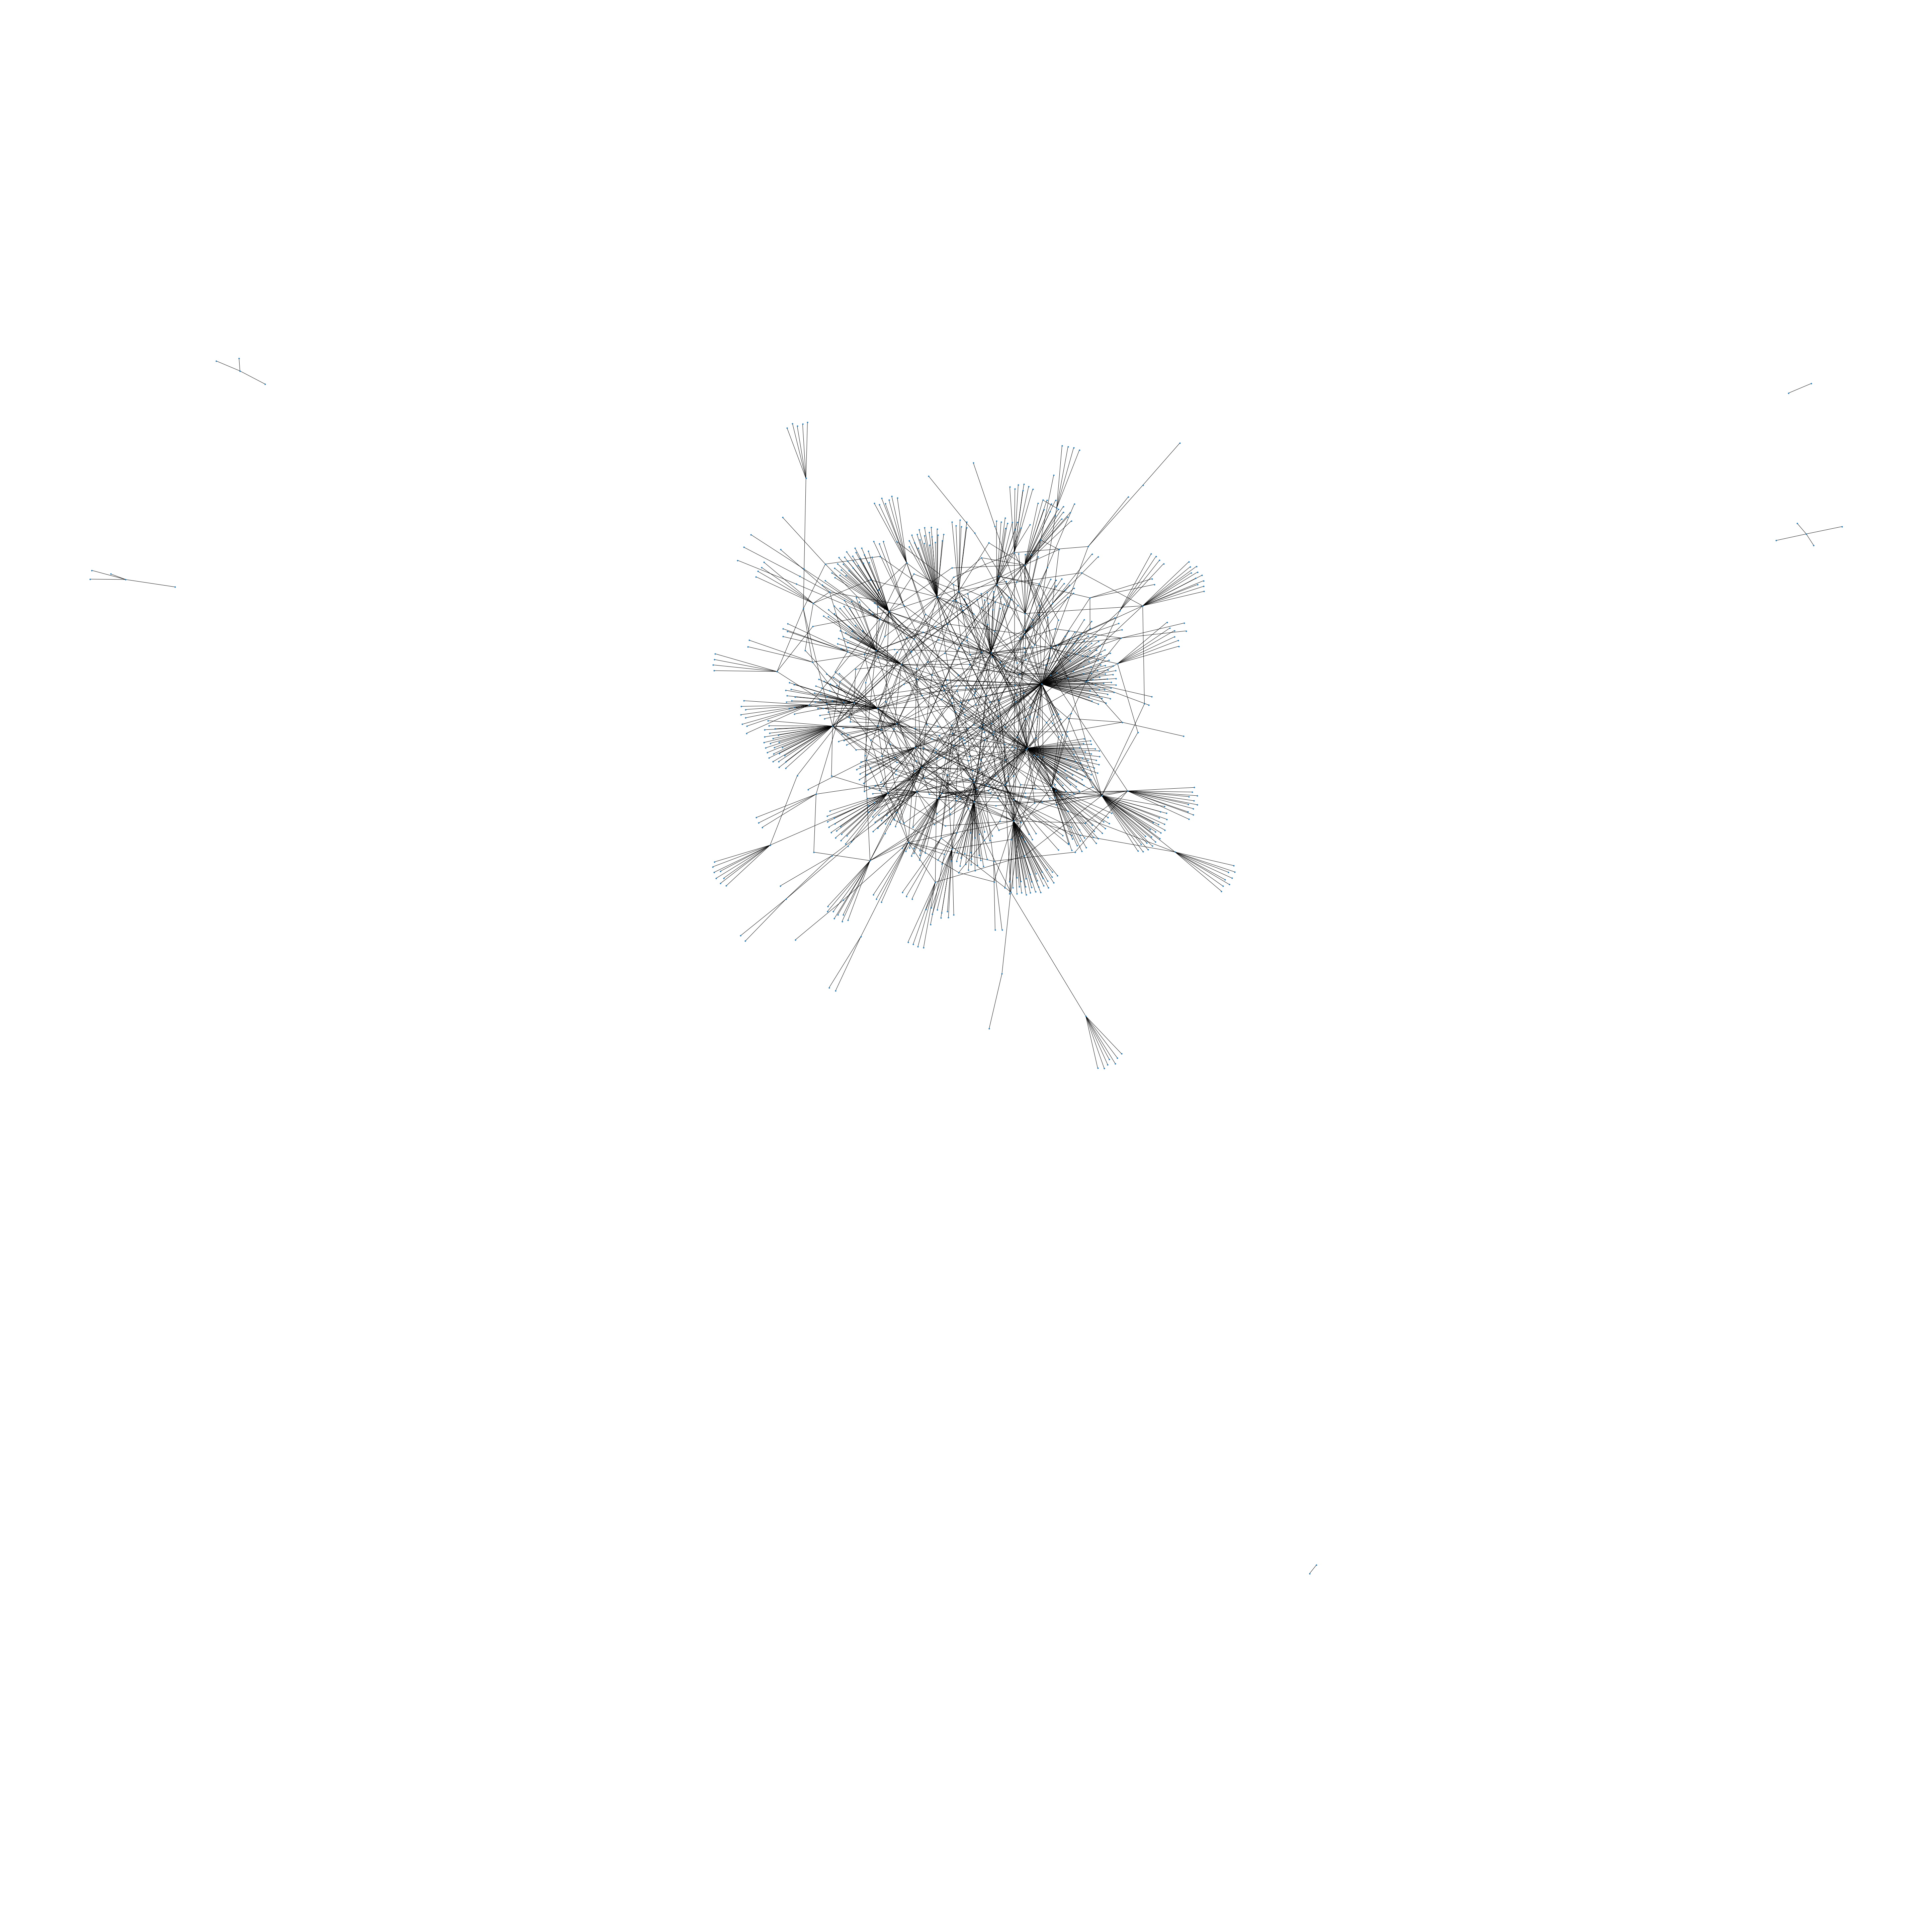

In [102]:
fig = plt.figure(figsize=(80, 80)) 

# nx.draw(tips_network, with_labels=True)
# nx.draw(tips_network, pos=nx.spring_layout(tips_network), node_size=10)
nx.draw(tips_network_graph, node_size=10)
plt.axis('equal') 
plt.show()

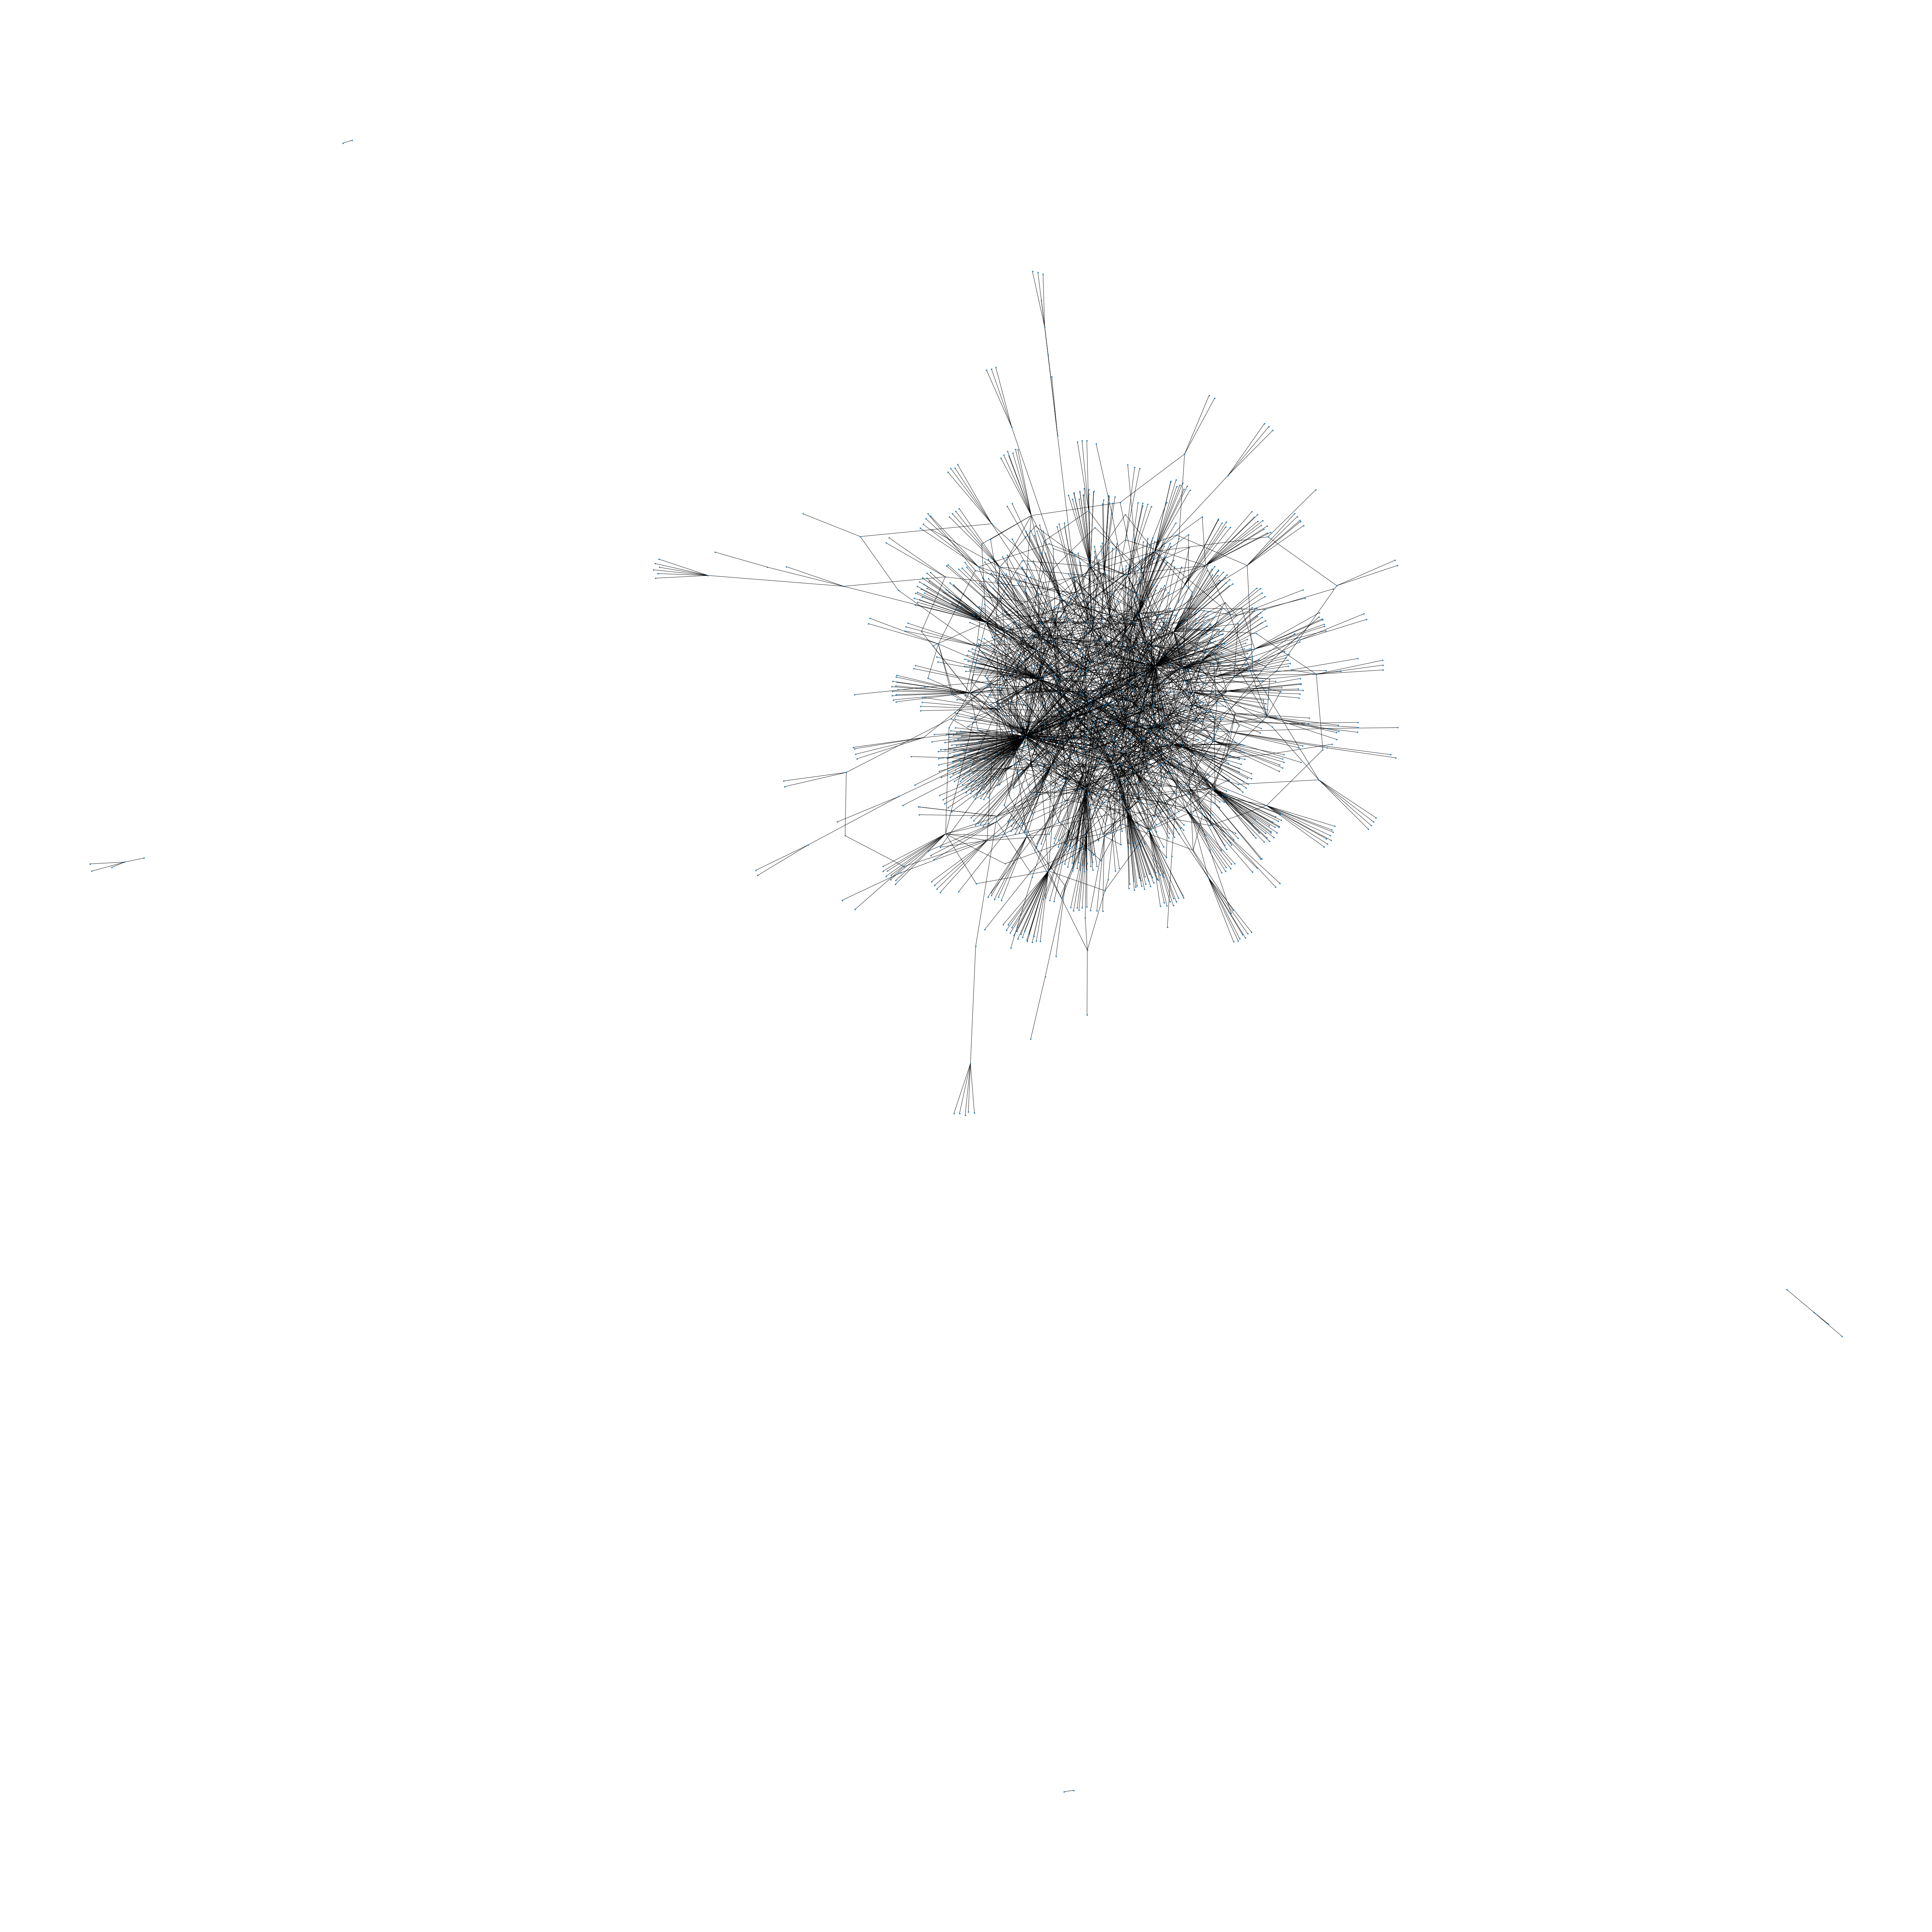

In [101]:
fig = plt.figure(figsize=(80, 80)) 
# nx.draw(checkin_network_graph, with_labels=True)
nx.draw(checkin_network_graph, pos=nx.spring_layout(checkin_network_graph), node_size=10)
# nx.draw(checkin_network_graph, node_size=10)

plt.axis('equal') 
plt.show()

# Conclusion

# Citation

D. Yang, et al. "Fine-grained preference-aware location search leveraging crowdsourced digital footprints from LBSNs." Proceedings of the 2013 ACM international joint conference on Pervasive and ubiquitous computing. ACM. (2013).